# Median Price

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'lt.ns'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+05:30,1308.400024,1318.900024,1303.000000,1309.949951,1226.583984,3123998
2020-01-02 00:00:00+05:30,1312.000000,1348.000000,1311.000000,1345.300049,1259.684448,4335359
2020-01-03 00:00:00+05:30,1344.949951,1344.949951,1330.150024,1335.050049,1250.086548,2059871
2020-01-06 00:00:00+05:30,1331.000000,1332.000000,1314.099976,1316.750000,1232.951172,2646905
2020-01-07 00:00:00+05:30,1328.000000,1339.500000,1313.750000,1320.500000,1236.462524,2077893


In [3]:
df['Median_Price'] = (df['High'] + df['Low'])/2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


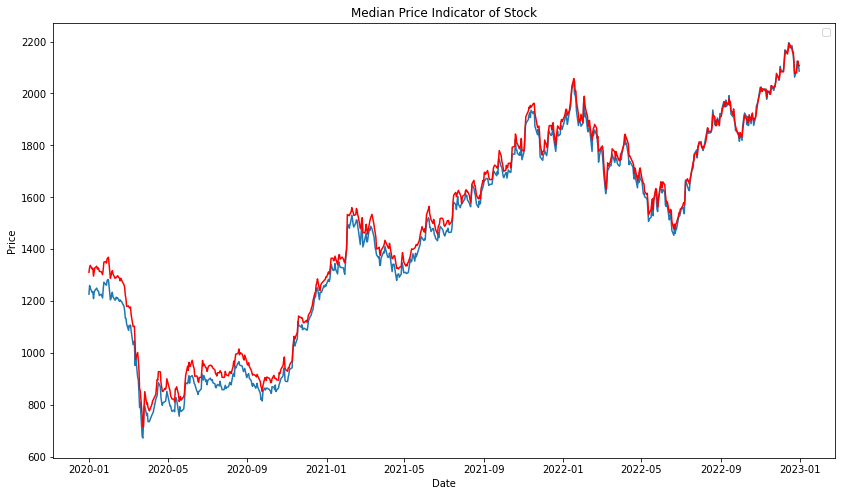

In [4]:
plt.figure(figsize=(14,8))
plt.plot(df['Adj Close'])
plt.plot(df['Median_Price'], color='red')
plt.title('Median Price Indicator of Stock')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## Candlestick with Median Price

In [5]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Median_Price,VolumePositive
0,18261.770833,1308.400024,1318.900024,1303.000000,1309.949951,1226.583984,3123998,1310.950012,False
1,18262.770833,1312.000000,1348.000000,1311.000000,1345.300049,1259.684448,4335359,1329.500000,False
2,18263.770833,1344.949951,1344.949951,1330.150024,1335.050049,1250.086548,2059871,1337.549988,False
3,18266.770833,1331.000000,1332.000000,1314.099976,1316.750000,1232.951172,2646905,1323.049988,False
4,18267.770833,1328.000000,1339.500000,1313.750000,1320.500000,1236.462524,2077893,1326.625000,False


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Date')

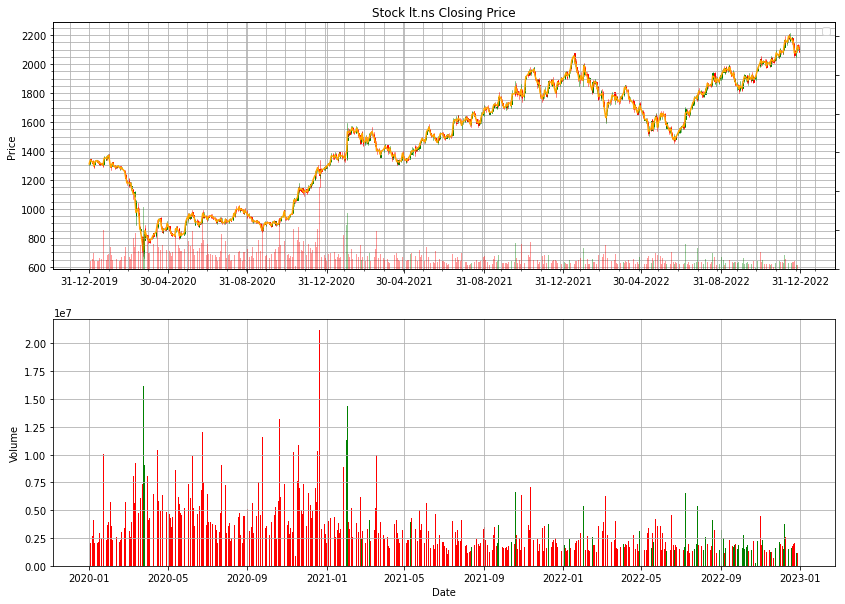

In [7]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df['Median_Price'], color='orange')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend()

ax2 = plt.subplot(2, 1, 2)
df['VolumePositive'] = df['Open'] < df['Adj Close']
ax2.bar(df.index, df['Volume'], color=df.VolumePositive.map({True: 'g', False: 'r'}), label='macdhist')
ax2.grid()
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')